In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('weather1.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
df['Date'].nunique()

3004

In [6]:
df['Location'].nunique()

12

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
#huge number of null values are present in the 'Evaporation','Sunshine','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm'

#removing the rows containing null values would cause huge data loss.
#so we are replacing the vacant sapaces with mean values.

#'RainToday' and 'RainTomorrow' contain nominal data. So we are dropping the rows containing null values.

In [9]:
df[(df['Location']=='Albury')]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2011-06-21,Albury,6.6,11.6,10.6,NaN,NaN,NNW,65.0,NW,...,93.0,58.0,1002.0,1003.9,8.0,2.0,6.8,10.3,Yes,No
903,2011-06-22,Albury,5.9,11.1,0.6,NaN,NaN,NW,43.0,WNW,...,93.0,69.0,1013.3,1013.6,8.0,8.0,6.3,10.4,No,Yes
904,2011-06-23,Albury,6.2,14.2,3.4,NaN,NaN,W,43.0,W,...,85.0,70.0,1020.2,1020.9,8.0,NaN,11.0,13.3,Yes,No
905,2011-06-24,Albury,2.9,13.1,0.0,NaN,NaN,WNW,15.0,NE,...,99.0,87.0,1028.3,1027.8,NaN,NaN,6.4,11.9,No,No


In [10]:
df['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [11]:
df[(df['Location']=='Albury')]['Evaporation'].nunique()

0

In [12]:
df[(df['Location']=='Uluru')]['Evaporation'].nunique()

0

In [13]:
#starting the dropping or replacing operation for null values.
df=df.dropna(subset = ['RainToday', 'RainTomorrow'])

In [14]:
df['Date']=pd.to_datetime(df['Date'])
df['Date_year']=df['Date'].dt.year
df['Date_month']=df['Date'].dt.month
df['Date_day']=df['Date'].dt.day

In [15]:
df=df.drop(columns=['Date'],axis=1)

In [16]:
df_new=df.drop(columns=['Rainfall','RainTomorrow'],axis=1)
df_new['Rainfall']=df['Rainfall']
df_new['RainTomorrow']=df['RainTomorrow']
df=df_new

In [17]:
#dropping rows that contains null vlaues in columns having nominal data.
df=df.dropna(subset = ['Location','WindGustDir','WindDir9am','WindDir3pm'])

In [18]:
df.shape

(6716, 25)

In [19]:
#applying Label_Encoder on all columns having null values.
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])
        

In [20]:
df_ent_dp=df.dropna()
df_ent_dp.shape

(3790, 25)

In [21]:
df_mean=df
for i in df_mean.columns:
    if df.isnull().sum()[i]>0:
        df_mean[i]=df_mean[i].fillna(df_mean[i].mean())

In [22]:
df_mean.shape

(6716, 25)

In [23]:
df_median=df
for i in df_median.columns:
    if df.isnull().sum()[i]>0:
        df_median[i]=df_median[i].fillna(df_median[i].median())

In [24]:
df_mode=df
for i in df_mode.columns:
    if df.isnull().sum()[i]>0:
        df_mode[i]=df_mode[i].fillna(df_mode[i].mode())

In [25]:
df_mode.shape

(6716, 25)

In [26]:
#now testing which dataset works best with the Regression models.
#trying first with df_ent_dp
x=df_ent_dp.drop(columns=['Rainfall'],axis=1)
y=df_ent_dp['Rainfall']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
scaler = StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.3204083617915219
r2_score for RandomForestRegression is:  0.36831829002585637
r2_score for KNeighborsRegression is:  0.3476928725540417


In [27]:
#now testing which dataset works best with the Regression models.
#trying first with df_mean
x=df_mean.drop(columns=['Rainfall'],axis=1)
y=df_mean['Rainfall']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
scaler = StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

#we are obatining better results here.

r2_score for LinearRegression is:  0.26739595436233765
r2_score for RandomForestRegression is:  0.6396536959611696
r2_score for KNeighborsRegression is:  0.3816602714992129


In [28]:
#now testing which dataset works best with the Regression models.
#trying first with df_median
x=df_median.drop(columns=['Rainfall'],axis=1)
y=df_median['Rainfall']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
scaler = StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))


r2_score for LinearRegression is:  0.26739595436233765
r2_score for RandomForestRegression is:  0.6175244052795481
r2_score for KNeighborsRegression is:  0.3816602714992129


In [29]:
#now testing which dataset works best with the Regression models.
#trying first with df_mode
x=df_mode.drop(columns=['Rainfall'],axis=1)
y=df_mode['Rainfall']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("r2_score for LinearRegression is: ",r2_score(y_test,y_pred_lr))

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

knr=KNeighborsRegressor()
scaler = StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("r2_score for KNeighborsRegression is: ",r2_score(y_test,y_pred_knr))

r2_score for LinearRegression is:  0.26739595436233765
r2_score for RandomForestRegression is:  0.6178896879892721
r2_score for KNeighborsRegression is:  0.3816602714992129


In [30]:
#Now testing which dataset works best for the classification problem.
#trying first with df_ent_dp
x=df_ent_dp.drop(columns=['RainTomorrow'],axis=1)
y=df_ent_dp['RainTomorrow']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_gnb))

knr=KNeighborsClassifier()
scaler = StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))


Accuarcy_score for LogisticRegression is:  0.8573141486810552
Accuarcy_score for RandomForestClassifier is:  0.8992805755395683
Accuarcy_score for GaussianNaiveBayes is:  0.7889688249400479
Accuarcy_score for KNeighborsClassifier is:  0.854916067146283


In [31]:
#Now testing which dataset works best for the classification problem.
#trying  with df_mean
x=df_mean.drop(columns=['RainTomorrow'],axis=1)
y=df_mean['RainTomorrow']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_gnb))

knr=KNeighborsClassifier()
scaler = StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))


#performance of this dataset detoriated for all models except GaussianNaiveBayes.

Accuarcy_score for LogisticRegression is:  0.8294993234100135
Accuarcy_score for RandomForestClassifier is:  0.8883626522327469
Accuarcy_score for GaussianNaiveBayes is:  0.8058186738836265
Accuarcy_score for KNeighborsClassifier is:  0.8457374830852503


In [32]:
#Now testing which dataset works best for the classification problem.
#trying  with df_median
x=df_median.drop(columns=['RainTomorrow'],axis=1)
y=df_median['RainTomorrow']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_gnb))

knr=KNeighborsClassifier()
scaler = StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

#df_ent_df is giving best results till now

Accuarcy_score for LogisticRegression is:  0.8294993234100135
Accuarcy_score for RandomForestClassifier is:  0.8971583220568335
Accuarcy_score for GaussianNaiveBayes is:  0.8058186738836265
Accuarcy_score for KNeighborsClassifier is:  0.8457374830852503


In [33]:
#Now testing which dataset works best for the classification problem.
#trying  with df_mode
x=df_mode.drop(columns=['RainTomorrow'],axis=1)
y=df_mode['RainTomorrow']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("Accuarcy_score for LogisticRegression is: ",accuracy_score(y_test,y_pred_lr))

rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("Accuarcy_score for RandomForestClassifier is: ",accuracy_score(y_test,y_pred_rfr))

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb=gnb.predict(x_test)
print("Accuarcy_score for GaussianNaiveBayes is: ",accuracy_score(y_test,y_pred_gnb))

knr=KNeighborsClassifier()
scaler = StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)
knr.fit(x_train,y_train)
y_pred_knr=knr.predict(x_test)
print("Accuarcy_score for KNeighborsClassifier is: ",accuracy_score(y_test,y_pred_knr))

Accuarcy_score for LogisticRegression is:  0.8294993234100135
Accuarcy_score for RandomForestClassifier is:  0.8971583220568335
Accuarcy_score for GaussianNaiveBayes is:  0.8058186738836265
Accuarcy_score for KNeighborsClassifier is:  0.8457374830852503


In [34]:
#All datasets are giving good accuracy.
#We are approaching with df_median since it is giving good accuracy with both classification and regression problem.

#### df_median is our final dataset.

# EDA

In [36]:
df_median.describe()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_year,Date_month,Date_day,Rainfall,RainTomorrow
count,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,...,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000,6716.000000
mean,5.369863,13.455959,24.032207,5.386600,7.736306,7.746724,40.844253,7.713073,7.775908,15.419595,...,4.577622,4.508544,18.076408,22.590557,0.246575,2011.849017,6.357356,15.783800,2.785468,0.244044
std,2.878044,5.322434,6.203860,3.330232,3.017684,4.740883,14.378932,4.677764,4.647448,9.509016,...,2.406488,2.324459,5.563883,6.035226,0.431049,2.488422,3.467804,8.782048,9.460671,0.429551
min,0.000000,-1.300000,8.200000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,1.900000,7.300000,0.000000,2008.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,9.500000,19.400000,3.600000,7.500000,3.000000,31.000000,3.000000,4.000000,9.000000,...,3.000000,3.000000,14.000000,18.200000,0.000000,2010.000000,3.000000,8.000000,0.000000,0.000000
50%,5.000000,13.500000,23.400000,5.386600,7.736306,8.000000,39.000000,8.000000,8.000000,13.000000,...,4.577622,4.508544,18.000000,22.000000,0.000000,2011.000000,6.000000,16.000000,0.000000,0.000000
75%,7.000000,17.500000,28.200000,5.800000,9.600000,12.000000,50.000000,12.000000,12.000000,20.000000,...,7.000000,7.000000,22.200000,26.600000,0.000000,2014.000000,9.000000,23.000000,1.000000,0.000000
max,10.000000,28.500000,45.500000,59.200000,13.900000,15.000000,107.000000,15.000000,15.000000,61.000000,...,8.000000,8.000000,39.400000,44.100000,1.000000,2017.000000,12.000000,31.000000,225.000000,1.000000


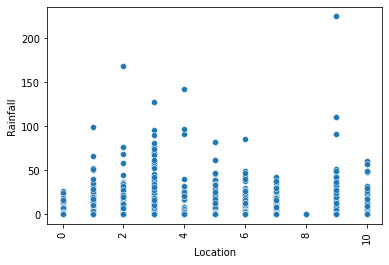

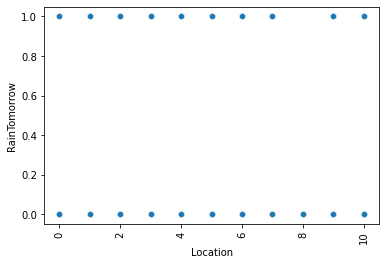

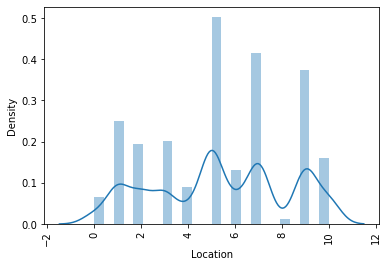

In [25]:
i=df_median['Location']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

#Some locations are present very high number of times.

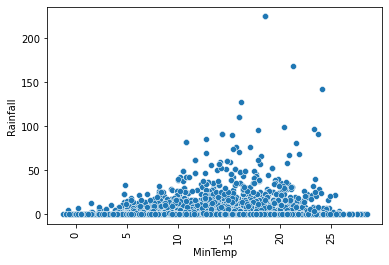

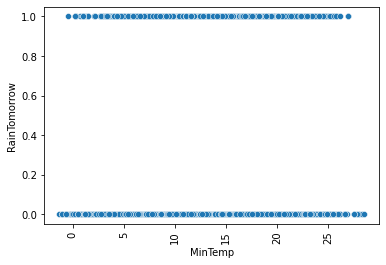

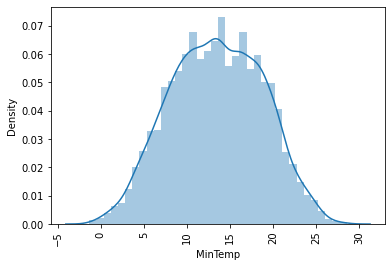

In [26]:
i=df_median['MinTemp']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

#higher rainfall in the min_tempreature range of 10 to 25

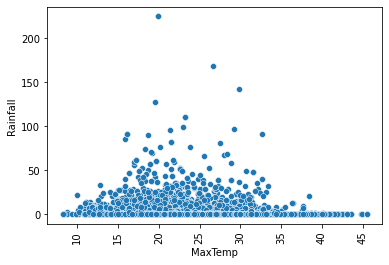

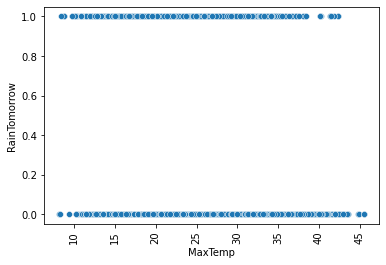

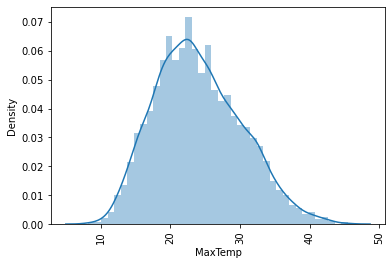

In [27]:
i=df_median['MaxTemp']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

#in the higher range of maximum temp ,there is less chance of rainfall.

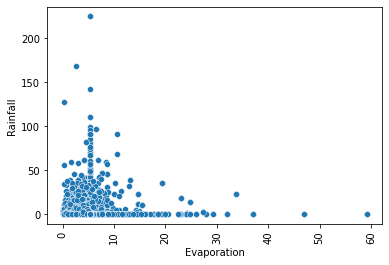

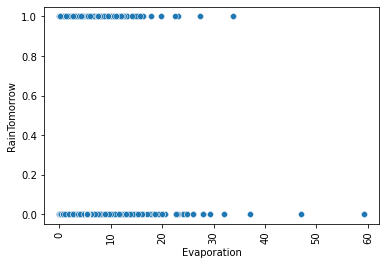

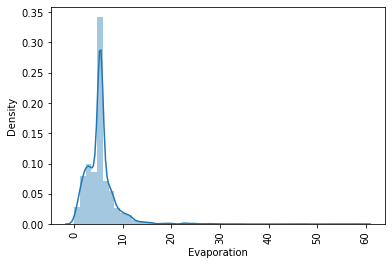

In [28]:
i=df_median['Evaporation']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

#There is less chance of rainfall when evaporation is high
#also skewness present in Evaporation column.

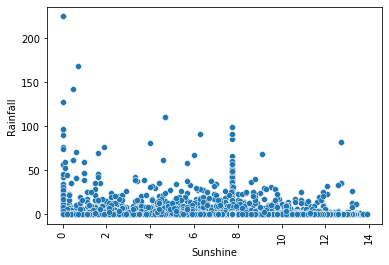

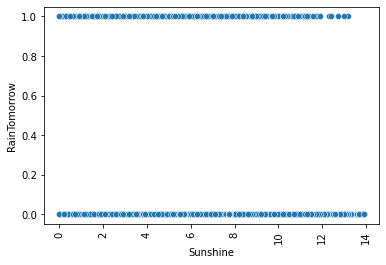

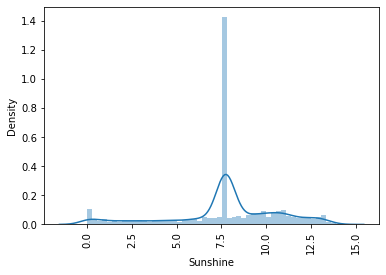

In [29]:
i=df_median['Sunshine']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

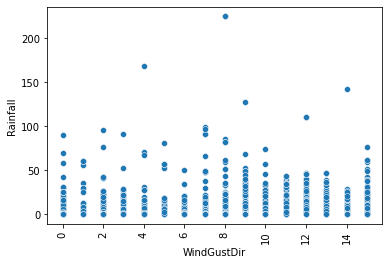

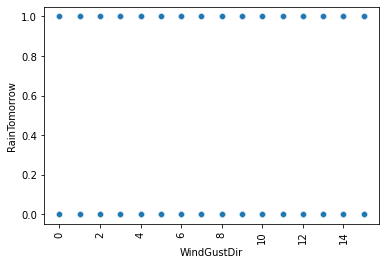

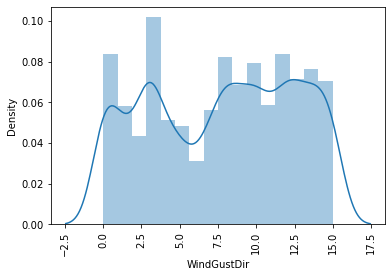

In [30]:
i=df_median['WindGustDir']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

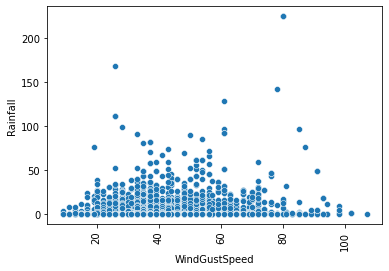

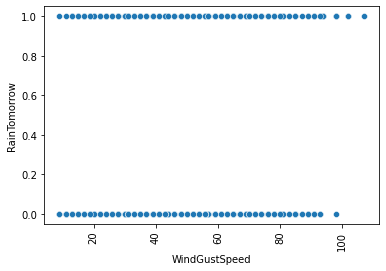

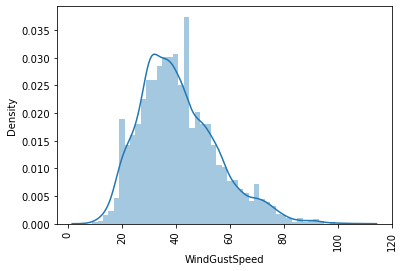

In [31]:
i=df_median['WindGustSpeed']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

#windspeed in the range of 20 to 80 has higher chances of rainfall.

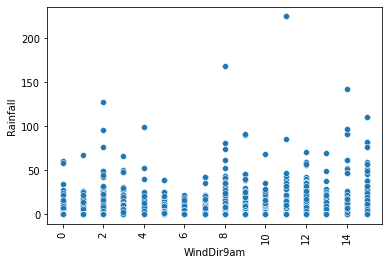

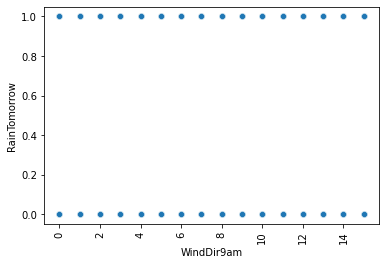

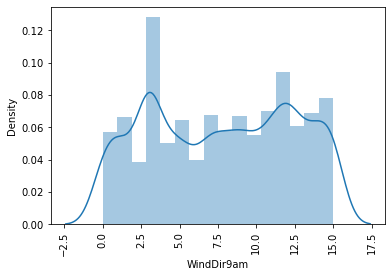

In [32]:
i=df_median['WindDir9am']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

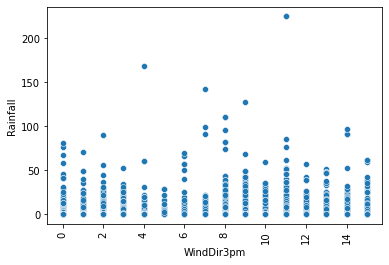

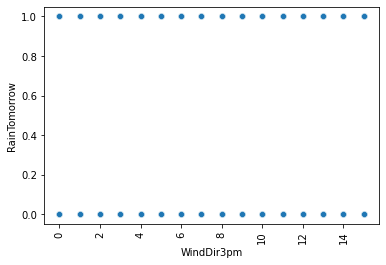

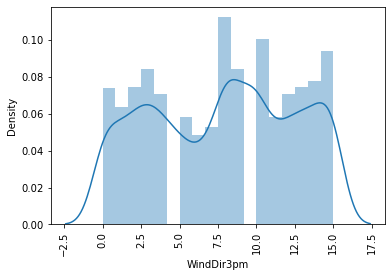

In [33]:
i=df_median['WindDir3pm']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

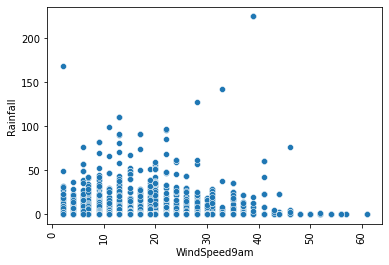

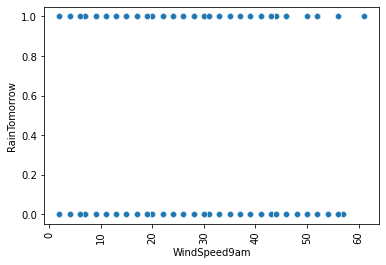

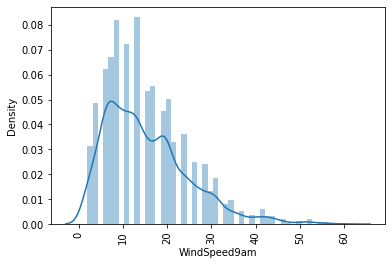

In [34]:
i=df_median['WindSpeed9am']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

#skewness present in data.

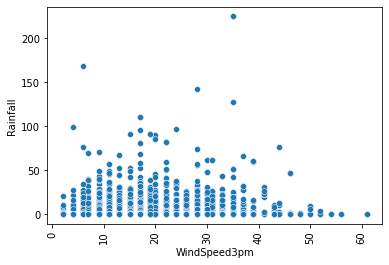

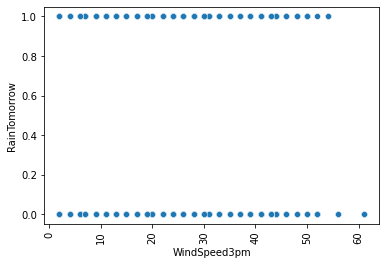

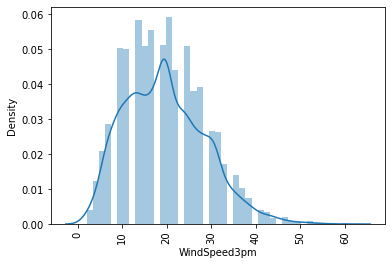

In [35]:
i=df_median['WindSpeed3pm']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()


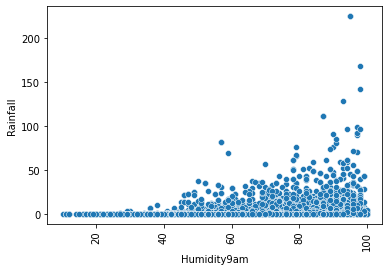

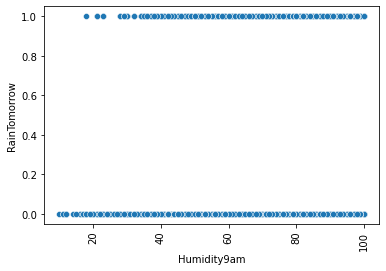

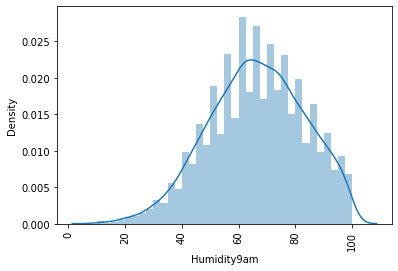

In [36]:
i=df_median['Humidity9am']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

#higher the humidity at 9 am , higher the chances of rainfall.

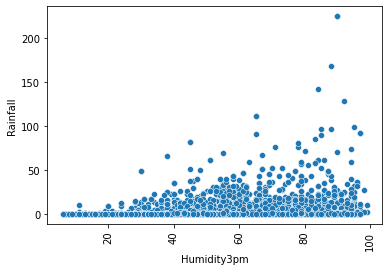

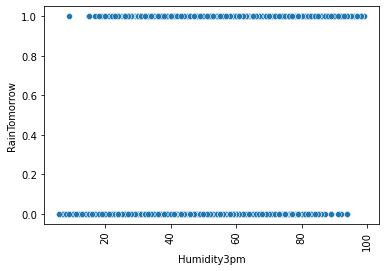

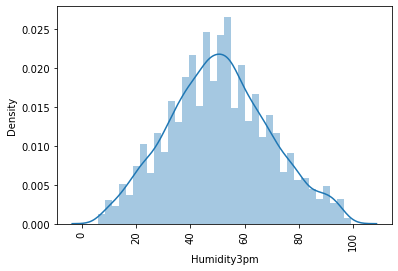

In [37]:
i=df_median['Humidity3pm']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

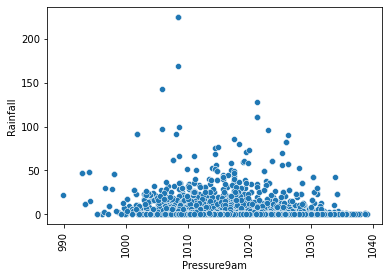

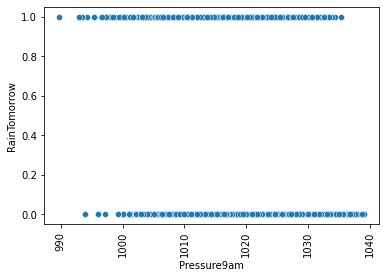

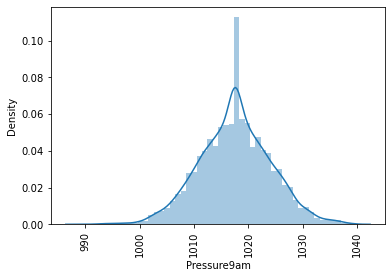

In [38]:
i=df_median['Pressure9am']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

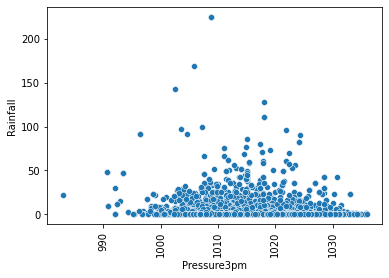

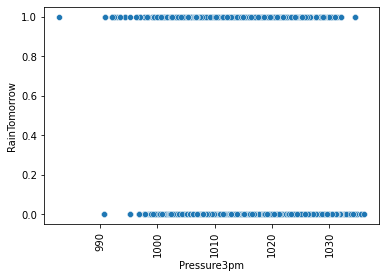

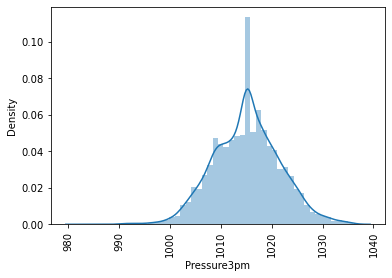

In [39]:
i=df_median['Pressure3pm']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

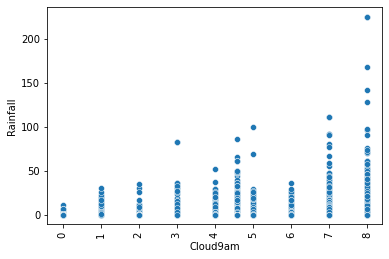

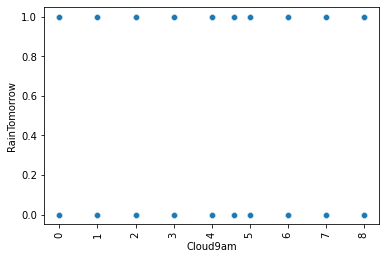

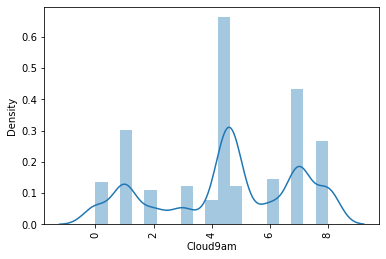

In [40]:
i=df_median['Cloud9am']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

#greater the cloud cover, greater the rainfall chances.

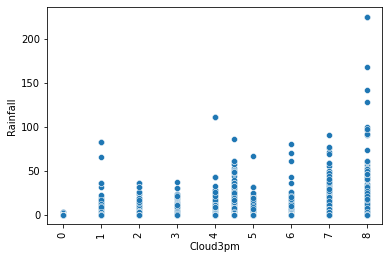

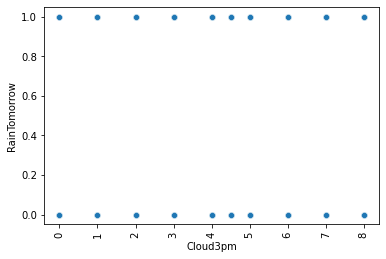

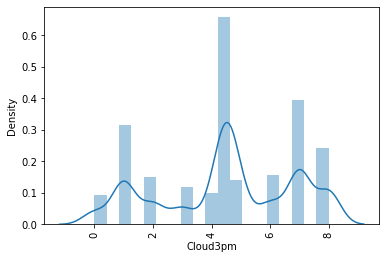

In [41]:
i=df_median['Cloud3pm']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

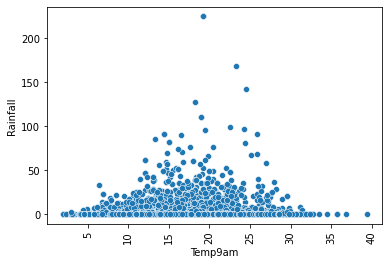

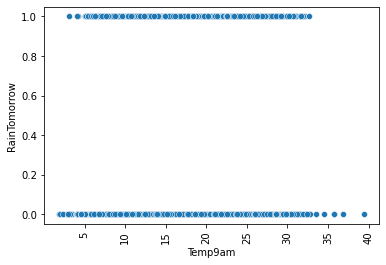

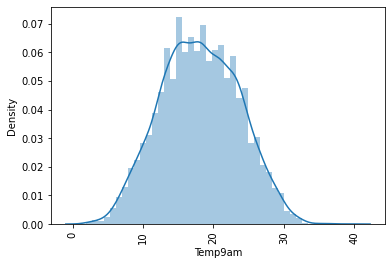

In [42]:
i=df_median['Temp9am']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

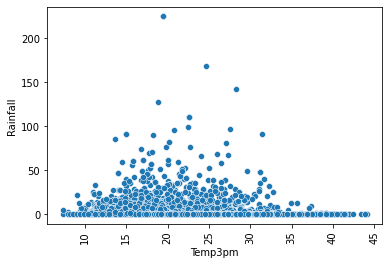

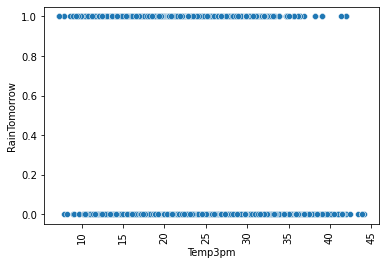

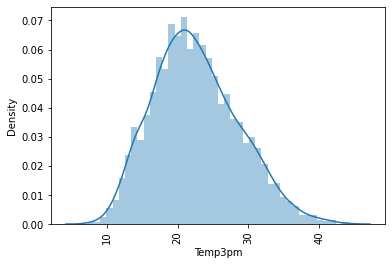

In [43]:
i=df_median['Temp3pm']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

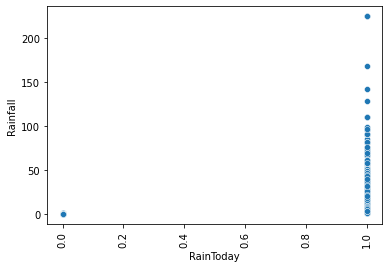

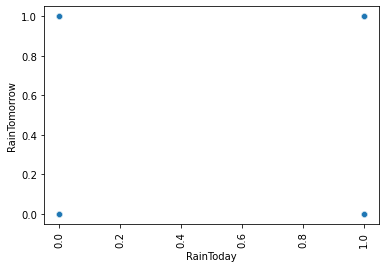

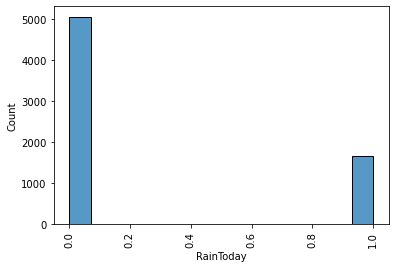

In [44]:
i=df_median['RainToday']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.histplot(i)
plt.xticks(rotation=90)
plt.show()

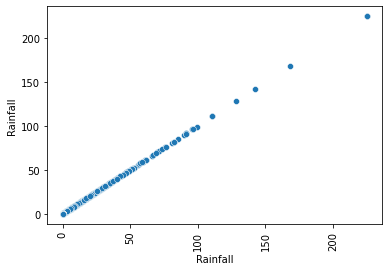

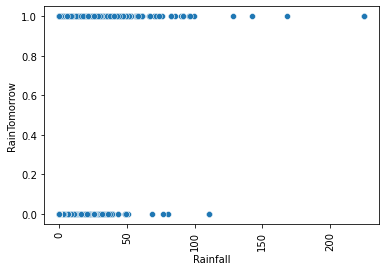

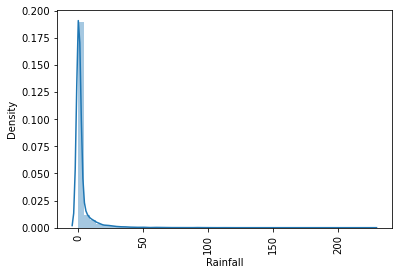

In [45]:
i=df_median['Rainfall']

sns.scatterplot(i,df_median['Rainfall'])
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(i,df_median['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

sns.distplot(i)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

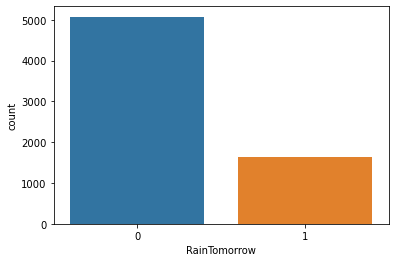

In [46]:
sns.countplot(df_median['RainTomorrow'])

#imbalance present in dataset, hence SMOTE needs to be applied.

In [47]:
#Since the dataset is imbalanced, we are applying SMOTE on it
x=df_median.iloc[:,0:-1]
y=df_median.iloc[:,-1]

from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y) 

In [48]:
df_median=x
df_median['RainTomorrow']=y

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

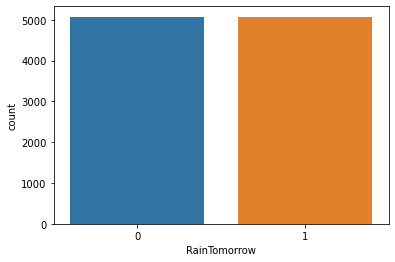

In [49]:
sns.countplot(df_median['RainTomorrow'])

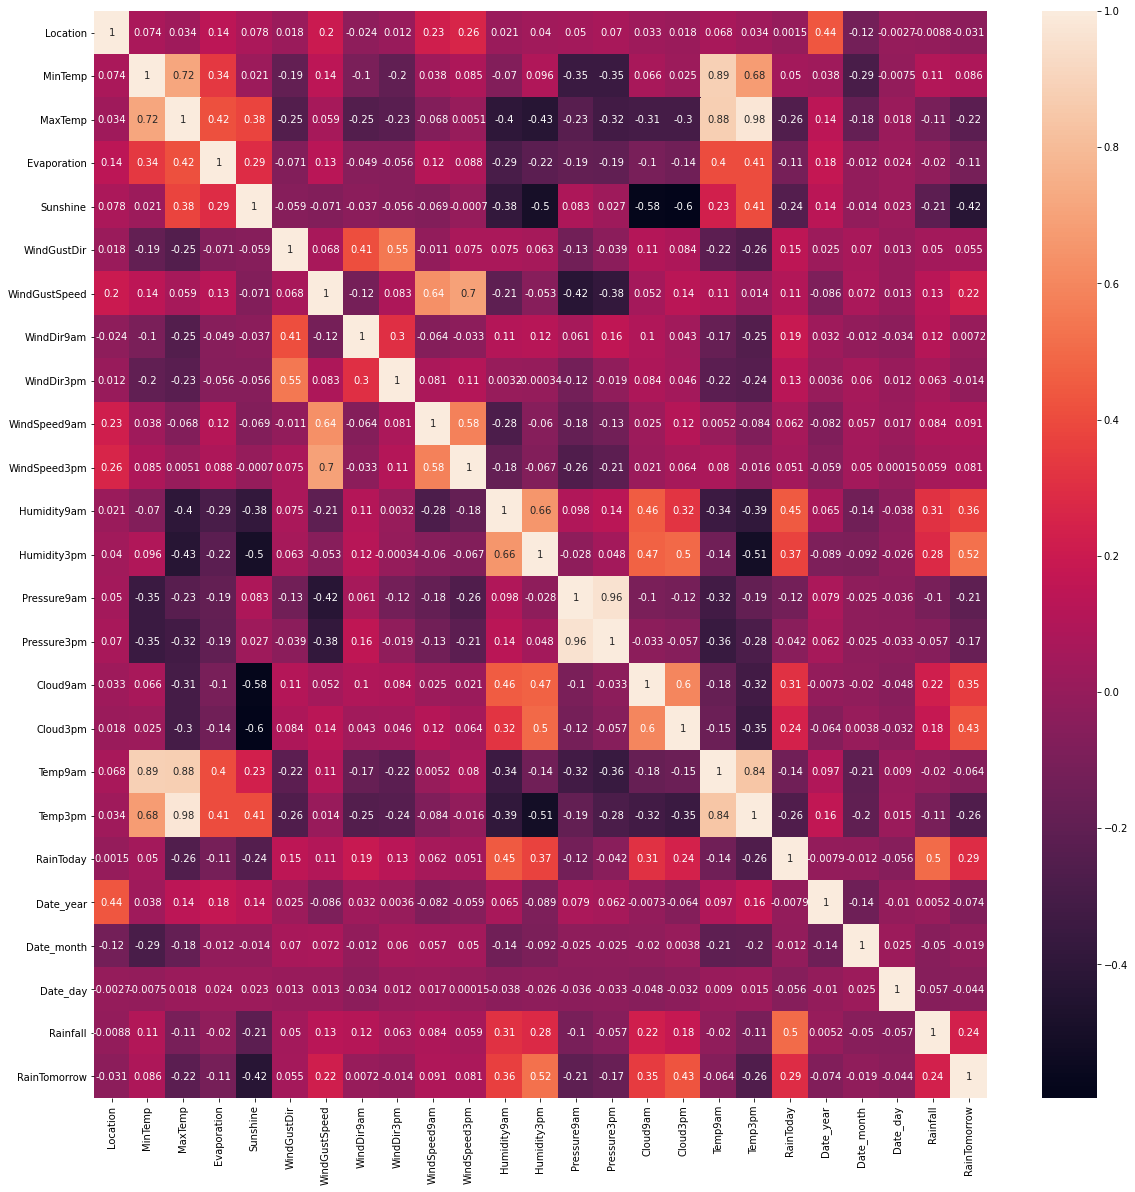

In [62]:
plt.figure(figsize=(20,20))
sns.heatmap(df_median.corr(),annot=True)
plt.show()

In [50]:
df=df_median.drop(columns=['WindDir9am','Location','WindGustDir','WindDir3pm','Date_year','Date_month','Date_day'],axis=1)

In [51]:
df_irev=df_median.drop(columns=['Location','Date_year','Date_day'],axis=1)

In [65]:
df.skew()
#low skewness present in all input columns except Evaporation.

MinTemp         -0.042605
MaxTemp          0.446907
Evaporation      3.940770
Sunshine        -0.535960
WindGustSpeed    0.630543
WindSpeed9am     1.028435
WindSpeed3pm     0.459105
Humidity9am     -0.362434
Humidity3pm     -0.044922
Pressure9am     -0.028444
Pressure3pm      0.010993
Cloud9am        -0.554575
Cloud3pm        -0.520742
Temp9am          0.084383
Temp3pm          0.466858
RainToday        0.877715
Rainfall         7.268406
RainTomorrow     0.000000
dtype: float64

In [52]:
from sklearn.preprocessing import power_transform
df['Evaporation']=power_transform(df['Evaporation'].values.reshape(-1,1)) 

In [53]:
df['WindSpeed9am']=power_transform(df['WindSpeed9am'].values.reshape(-1,1)) 

In [54]:
df_irev.skew().sort_values(ascending=False)

Rainfall         7.283791
Evaporation      3.885658
WindSpeed9am     1.024123
RainToday        0.909289
WindGustSpeed    0.634414
WindSpeed3pm     0.479788
Temp3pm          0.451412
MaxTemp          0.427186
Date_month       0.088432
Temp9am          0.065185
Pressure3pm      0.033452
RainTomorrow     0.000000
Pressure9am     -0.002741
WindDir9am      -0.019916
Humidity3pm     -0.050189
MinTemp         -0.052147
WindDir3pm      -0.066013
WindGustDir     -0.161361
Humidity9am     -0.365443
Cloud3pm        -0.511834
Sunshine        -0.547117
Cloud9am        -0.557774
dtype: float64

In [55]:
from sklearn.preprocessing import power_transform
df['Evaporation']=power_transform(df['Evaporation'].values.reshape(-1,1)) 
df['WindSpeed9am']=power_transform(df['WindSpeed9am'].values.reshape(-1,1)) 
df['RainToday']=power_transform(df['RainToday'].values.reshape(-1,1)) 
df['Evaporation']=power_transform(df['Evaporation'].values.reshape(-1,1)) 
df['WindSpeed9am']=power_transform(df['WindSpeed9am'].values.reshape(-1,1)) 

# Outlier Removal

In [56]:
#outlier removal
from scipy.stats import zscore
z=np.abs(zscore(df))


df_new=df[(z<3.0).all(axis=1)]
print(df.shape)
print(df_new.shape)

print("loss_percent= ",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

(10154, 18)
(9664, 18)
loss_percent=  4.825684459326373


In [57]:
df=df_new

In [58]:
#outlier removal
from scipy.stats import zscore
z=np.abs(zscore(df_irev))


df_new=df_irev[(z<3.0).all(axis=1)]
print(df_irev.shape)
print(df_new.shape)

print("loss_percent= ",(df_irev.shape[0]-df_new.shape[0])/df_irev.shape[0]*100)

(10154, 22)
(9544, 22)
loss_percent=  6.007484735079772


In [59]:
df_irev=df_new

# Starting regression model training

#### Trying the LogisticRegression model

In [74]:
#testing with df
x=df.drop(columns=['Rainfall'],axis=1)
y=df['Rainfall'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.507416901323881
root_mean_sqaured_error: 4.195595503705479
mean_absolute_error: 2.3218213199655717


In [75]:
#testing with df_irev

x=df_irev.drop(columns=['Rainfall'],axis=1)
y=df_irev['Rainfall'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

#error increases with df_trev.
#So we will go with df for LinearRegression type models.

r2_score is: 0.48561806860876533
root_mean_sqaured_error: 4.333056734869504
mean_absolute_error: 2.3538680432420254


In [76]:
#trying different polynomials for LinearRegression with df
#varying the degree of polynomial in default Linear regresion model and finding their accuracy

x=df.drop(columns=['Rainfall'],axis=1)
y=df['Rainfall'].values


#degree=1
r=LinearRegression()
poly = PolynomialFeatures(1)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('polynomial is: 1')
print('r2_score is:',r2_score(y_test,y_pred))

#degree=2
r=LinearRegression()
poly = PolynomialFeatures(2)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('polynomial is: 2')
print('r2_score is:',r2_score(y_test,y_pred))

#degree=3
r=LinearRegression()
poly = PolynomialFeatures(3)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('polynomial is: 3')
print('r2_score is:',r2_score(y_test,y_pred))

#degree=4
r=LinearRegression()
poly = PolynomialFeatures(4)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('polynomial is: 4')
print('r2_score is:',r2_score(y_test,y_pred))

#best r2_score is obtained at degree=3
#The best r2_score obtained from LinearRegression is 0.5626582988850469

polynomial is: 1
r2_score is: 0.5074169013238818
polynomial is: 2
r2_score is: 0.5316718263913002
polynomial is: 3
r2_score is: 0.5319969170293815
polynomial is: 4
r2_score is: -11.43321741430063


#### Trying the ridge regression model

In [77]:
#testing with df

x=df.drop(columns=['Rainfall'],axis=1)
y=df['Rainfall'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=Ridge()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.5074217580378677
root_mean_sqaured_error: 4.195574820030331
mean_absolute_error: 2.3217812958320794


In [78]:
#testing with df_irev

x=df_irev.drop(columns=['Rainfall'],axis=1)
y=df_irev['Rainfall'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=Ridge()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

#df is giving better results fro ridge.

r2_score is: 0.48562002894862466
root_mean_sqaured_error: 4.333048478094329
mean_absolute_error: 2.3539650048062835


In [83]:
#trying different polynomials for LinearRegression with df_irev
#varying the degree of polynomial in default Linear regresion model and finding their accuracy

x=df.drop(columns=['Rainfall'],axis=1)
y=df['Rainfall'].values


#degree=1
r=Ridge()
poly = PolynomialFeatures(1)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('polynomial is: 1')
print('r2_score is:',r2_score(y_test,y_pred))

#degree=2
r=Ridge()
poly = PolynomialFeatures(2)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('polynomial is: 2')
print('r2_score is:',r2_score(y_test,y_pred))

#degree=3
r=Ridge()
poly = PolynomialFeatures(3)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('polynomial is: 3')
print('r2_score is:',r2_score(y_test,y_pred))

#Best accuarcy obtained is with degree 3

polynomial is: 1
r2_score is: 0.5074217580378678
polynomial is: 2
r2_score is: 0.5328370576361676
polynomial is: 3
r2_score is: 0.5389625683462775


In [86]:
#Applying GridSearchCV on ridge regression
r=Ridge()

x=df.drop(columns=['Rainfall'],axis=1)
y=df['Rainfall'].values

parameters={'alpha':[0.1,0.01,0.001,1],'solver':['auto', 'lbfgs']}
gd_sr=GridSearchCV(estimator=r, param_grid= parameters, scoring='r2')
poly = PolynomialFeatures(3)
X_=poly.fit_transform(x)
gd_sr.fit(X_,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'alpha': 1, 'solver': 'auto'}
0.42354623489037235


#### Trying the lasso regression model

In [89]:
#testing with df

x=df.drop(columns=['Rainfall'],axis=1)
y=df['Rainfall'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=Lasso()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is: 0.4717844662903946
root_mean_sqaured_error: 4.344696484058277
mean_absolute_error: 2.4417218138446923


In [90]:
#testing with df_irev

x=df_irev.drop(columns=['Rainfall'],axis=1)
y=df_irev['Rainfall'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=Ridge()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

#df_irev is giving better results for Lasso Regression model

r2_score is: 0.48562002894862466
root_mean_sqaured_error: 4.333048478094329
mean_absolute_error: 2.3539650048062835


In [92]:
#finding the r2_score of default lasso regression model
#varying the degree of polynomial in default lasso regresion model and finding their accuracy

x=df_irev.drop(columns=['Rainfall'],axis=1)
y=df_irev['Rainfall'].values

#degree=1
l=Lasso(alpha=0.1)
poly = PolynomialFeatures(1)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
l.fit(x_train,y_train)
y_pred=l.predict(x_test)
print('polynomial is:',1)
print('r2_score is:',r2_score(y_test,y_pred))

#degree=2
l=Lasso(alpha=.01)
poly = PolynomialFeatures(2)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
l.fit(x_train,y_train)
y_pred=l.predict(x_test)
print('polynomial is:',2)
print('r2_score is:',r2_score(y_test,y_pred))

#degree=3
l=Lasso(alpha=0.1)
poly = PolynomialFeatures(3)
X_=poly.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X_,y,test_size=0.20,random_state=42)
l.fit(x_train,y_train)
y_pred=l.predict(x_test)
print('polynomial is:',3)
print('r2_score is:',r2_score(y_test,y_pred))


polynomial is: 1
r2_score is: 0.48269382212919787
polynomial is: 2
r2_score is: 0.5348818268765513
polynomial is: 3
r2_score is: 0.580505087067041


In [94]:
#FInding the best parameters for lasso regression

x=df_irev.drop(columns=['Rainfall'],axis=1)
y=df_irev['Rainfall'].values

l=Lasso()
parameters={'alpha':[0.1,0.01,0.001,1]}
gd_sr=GridSearchCV(estimator=l, param_grid= parameters, scoring='r2')
poly = PolynomialFeatures(3)
X_=poly.fit_transform(x)
gd_sr.fit(X_,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'alpha': 1}
0.5319205198090019


#### Trying the KNNRegressor

In [96]:
#Finding the r2_score of KNNRegressor with df

x=df.drop(columns=['Rainfall'],axis=1)
y=df['Rainfall'].values

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

knr=KNeighborsRegressor()
x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=42)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print('The r2_score is',r2_score(y_test,y_pred))


The r2_score is 0.7109924029420023


In [97]:
#Finding the r2_score of KNNRegressor with df_irev

x=df_irev.drop(columns=['Rainfall'],axis=1)
y=df_irev['Rainfall'].values

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

knr=KNeighborsRegressor()
x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=42)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print('The r2_score is',r2_score(y_test,y_pred))

#df_irev is getting better results with KnnRegressor.

The r2_score is 0.7708202340391832


In [98]:
#Applying GridSearchCV on KNeighborsRegressor

x=df_irev.drop(columns=['Rainfall'],axis=1)
y=df_irev['Rainfall'].values

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

knr=KNeighborsRegressor()
parameters={'n_neighbors':[3,4,5,6,7,9],"weights":['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],}
gd_sr=GridSearchCV(estimator=knr, param_grid= parameters,scoring='r2')
gd_sr.fit(x_knc,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
0.7685075353564845


In [99]:
#Lets find the best random_state for the  above obtained parameters

max_r2_score=0
best_rand_state=0
x=df_irev.drop(columns=['Rainfall'],axis=1)
y=df_irev['Rainfall'].values

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=i)
    knr=KNeighborsRegressor(algorithm= 'ball_tree', n_neighbors= 3, weights= 'distance')
    knr.fit(x_train,y_train)
    y_pred=knr.predict(x_test)
    
    if r2_score(y_test,y_pred)>max_r2_score:
        max_r2_score=r2_score(y_test,y_pred)
        best_rand_state=i

print(max_r2_score)
print(best_rand_state)

0.885282384361453
52


In [101]:
#final Knnregressor model.
x=df_irev.drop(columns=['Rainfall'],axis=1)
y=df_irev['Rainfall'].values

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=52)
knr=KNeighborsRegressor(algorithm= 'ball_tree', n_neighbors= 3, weights= 'distance')
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is:  0.885282384361453
root_mean_sqaured_error: 2.0405666419172177
mean_absolute_error: 0.6477202586254177


#### Trying the RandomForestRegressor

In [102]:
#Finding the accuracy of default RandomForestRegressor with df
x=df.drop(columns=['Rainfall'],axis=1)
y=df['Rainfall'].values

rfr=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))


r2_score for RandomForestRegression is:  0.7737303708992324


In [103]:
#Finding the accuracy of default RandomForestRegressor with df_irev
x=df_irev.drop(columns=['Rainfall'],axis=1)
y=df_irev['Rainfall'].values

rfr=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
rfr.fit(x_train,y_train)
y_pred_rfr=rfr.predict(x_test)
print("r2_score for RandomForestRegression is: ",r2_score(y_test,y_pred_rfr))

#we are getting better results with df_irev for randomforestregressor.

r2_score for RandomForestRegression is:  0.8021223768549761


In [105]:
#Applying GridSearchCV on RandomForestRegressor.
x=df_irev.drop(columns=['Rainfall'],axis=1)
y=df_irev['Rainfall'].values

rfr=RandomForestRegressor()
parameters={'n_estimators':[80,90,100,110,120],'max_depth':[10,12,13,15,17,'None']}
gd_sr=GridSearchCV(estimator=rfr, param_grid= parameters,scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'max_depth': 17, 'n_estimators': 100}
0.7354313757171365


In [107]:
#Applying GridSearchCV on RandomForestRegressor.
x=df_irev.drop(columns=['Rainfall'],axis=1)
y=df_irev['Rainfall'].values

rfr=RandomForestRegressor()
parameters={'n_estimators':[90,95,100,105,110],'max_depth':[13,15,17,18,19,20,21,'None']}
gd_sr=GridSearchCV(estimator=rfr, param_grid= parameters,scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'max_depth': 21, 'n_estimators': 90}
0.7378838126969334


In [113]:
#Applying GridSearchCV on RandomForestRegressor.
x=df_irev.drop(columns=['Rainfall'],axis=1)
y=df_irev['Rainfall'].values

rfr=RandomForestRegressor()
parameters={'n_estimators':[80,85,90,95,100],'max_depth':[18,19,20,21,22,23,30,35,40,45,50,'None']}
gd_sr=GridSearchCV(estimator=rfr, param_grid= parameters,scoring='r2')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'max_depth': 22, 'n_estimators': 95}
0.7387857021716522


In [117]:
##finding out the best random state for random forest classifier model
#parameters are obtained from hyperparameter tuning.
#'max_depth'=22, 'n_estimators'=95
max_r2_score=0
best_rand_state=0
x=df_irev.drop(columns=['Rainfall'],axis=1)
y=df_irev['Rainfall'].values

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    rfr=RandomForestRegressor(max_depth=22,n_estimators=95)
    rfr.fit(x_train,y_train)
    y_pred=rfr.predict(x_test)
    
    if r2_score(y_test,y_pred)>max_r2_score:
        max_r2_score=r2_score(y_test,y_pred)
        best_rand_state=i

print(max_r2_score)
print(best_rand_state)

0.8278309948181919
90


In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=90)
rfr=RandomForestRegressor(max_depth= 22, n_estimators= 95)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print("r2_score is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is:  0.8274482776944189
root_mean_sqaured_error: 2.5696814054235912
mean_absolute_error: 1.1518900194362065


In [ ]:
We are getting best results from KNN regressor.
So we are finalising the KNN regressor model.

# Building the rainfall(regression) model

In [119]:
x=df_irev.drop(columns=['Rainfall'],axis=1)
y=df_irev['Rainfall'].values

scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=52)
knr=KNeighborsRegressor(algorithm= 'ball_tree', n_neighbors= 3, weights= 'distance')
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("r2_score is: ",r2_score(y_test,y_pred))
print('root_mean_sqaured_error:',mean_squared_error(y_test,y_pred)**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

r2_score is:  0.885282384361453
root_mean_sqaured_error: 2.0405666419172177
mean_absolute_error: 0.6477202586254177


# Saving the final model

In [120]:
import pickle
filename='rainfall.pkl'
pickle.dump(knr,open(filename,'wb'))

In [81]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
Rainfall         float64
RainTomorrow       int32
dtype: object

# Starting classification model training

#### Tring the Logistic Regression model

In [122]:
##finding the result of DEFAULT Logistic regression model with df
x=df.drop(columns=['RainTomorrow'],axis=1)
y=df['RainTomorrow']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[814 181]
 [224 712]]
accuracy_score= 0.7902641118591404
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       995
           1       0.80      0.76      0.78       936

    accuracy                           0.79      1931
   macro avg       0.79      0.79      0.79      1931
weighted avg       0.79      0.79      0.79      1931



In [123]:
##finding the result of DEFAULT Logistic regression model with df_irev
x=df_irev.drop(columns=['RainTomorrow'],axis=1)
y=df_irev['RainTomorrow']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

#we are getting better results with dataset df

[[782 195]
 [226 704]]
accuracy_score= 0.7792343995804929
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       977
           1       0.78      0.76      0.77       930

    accuracy                           0.78      1907
   macro avg       0.78      0.78      0.78      1907
weighted avg       0.78      0.78      0.78      1907



In [124]:
#Applying GridSearchCV on LogisitcRegression model

x=df.drop(columns=['RainTomorrow'],axis=1)
y=df['RainTomorrow']

lr=LogisticRegression()
parameters={'penalty':[ 'l2', 'none'],'solver':[ 'lbfgs', 'liblinear', 'sag', 'saga'],'C':[1.0,5.0,10.0,15.0],'max_iter':[100,120,140,150]}
gd_sr=GridSearchCV(estimator=lr, param_grid= parameters,scoring='accuracy')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'C': 5.0, 'max_iter': 100, 'penalty': 'none', 'solver': 'saga'}
0.7715173485240808


In [125]:
#Applying GridSearchCV on LogisitcRegression model
x=df.drop(columns=['RainTomorrow'],axis=1)
y=df['RainTomorrow']

lr=LogisticRegression()
parameters={'penalty':[ 'l2', 'l1'],'solver':['liblinear', 'saga'],'C':[1.0,5.0,10.0,15.0],'max_iter':[100,120,140,150]}
gd_sr=GridSearchCV(estimator=lr, param_grid= parameters,scoring='accuracy')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'C': 5.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
0.7713102019678922


In [61]:
#Applying GridSearchCV on LogisitcRegression model
x=df.drop(columns=['RainTomorrow'],axis=1)
y=df['RainTomorrow']

lr=LogisticRegression()
parameters={'penalty':[ 'l2', 'none'],'solver':['newton-cg', 'lbfgs','sag'],'C':[1.0,5.0,7.0,8.0,10.0,14.0,15.0,16.0],'max_iter':[80,90,100,110,120,130]}
gd_sr=GridSearchCV(estimator=lr, param_grid= parameters,scoring='accuracy')
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

#best accuracy is obtained here.

{'C': 5.0, 'max_iter': 80, 'penalty': 'l2', 'solver': 'sag'}
0.7717361849708506


In [62]:
#finding the best random state for Logistic Regression model
x=df.drop(columns=['RainTomorrow'],axis=1)
y=df['RainTomorrow']

max_acc_score=0
best_rand_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LogisticRegression(penalty='l2', solver= 'sag', C=5.0, max_iter=80)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state)

0.8028970512157269
67


In [64]:
#making the final logistic regression model.
x=df.drop(columns=['RainTomorrow'],axis=1)
y=df['RainTomorrow']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=67)
lr=LogisticRegression(penalty='l2', solver= 'sag', C=5.0, max_iter=80)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[784 157]
 [223 769]]
accuracy_score= 0.8034143817899638
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       941
           1       0.83      0.78      0.80       992

    accuracy                           0.80      1933
   macro avg       0.80      0.80      0.80      1933
weighted avg       0.81      0.80      0.80      1933



##### Tring the KNeighborsClassifier model

In [71]:
##finding the result of DEFAULT KNeighborsClassifier  model with df
x=df.drop(columns=['RainTomorrow'],axis=1)
y=df['RainTomorrow']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_knc=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=42)
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred=knc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[771 222]
 [ 68 872]]
accuracy_score= 0.8499741334712881
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       993
           1       0.80      0.93      0.86       940

    accuracy                           0.85      1933
   macro avg       0.86      0.85      0.85      1933
weighted avg       0.86      0.85      0.85      1933



In [70]:
##finding the result of DEFAULT KNeighborsClassifier  model with df_irev
x=df_irev.drop(columns=['RainTomorrow'],axis=1)
y=df_irev['RainTomorrow']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_knc=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=42)
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred=knc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

#df_irev is giving better results with the KNN classifier

[[810 188]
 [ 44 867]]
accuracy_score= 0.8784704033525406
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       998
           1       0.82      0.95      0.88       911

    accuracy                           0.88      1909
   macro avg       0.89      0.88      0.88      1909
weighted avg       0.89      0.88      0.88      1909



In [72]:
#applying GridSearchCV on KneighborsClassifier
x=df_irev.drop(columns=['RainTomorrow'],axis=1)
y=df_irev['RainTomorrow']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_knc=scaler.fit_transform(x)

knc=KNeighborsClassifier()
parameters={'n_neighbors':[5,6,7,8,9,10,11,12,14],'algorithm':['auto','ball_tree','kd_tree','brute'],'weights':['uniform','distance'],'p':[1,2]}
gd_sr=GridSearchCV(estimator=knc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x_knc,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


{'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
0.8516327272447735


In [74]:
#finding the best random state for KNN classifier model
x=df_irev.drop(columns=['RainTomorrow'],axis=1)
y=df_irev['RainTomorrow']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_knc=scaler.fit_transform(x)
max_acc_score=0
best_rand_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=i)
    knc=KNeighborsClassifier(algorithm='auto',n_neighbors=6,p=1,weights='distance')
    knc.fit(x_train,y_train)
    y_pred=knc.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state)

0.9397590361445783
3


In [75]:
#building the final KNC model
x=df_irev.drop(columns=['RainTomorrow'],axis=1)
y=df_irev['RainTomorrow']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_knc=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_knc,y,test_size=0.20,random_state=3)
knc=KNeighborsClassifier(algorithm='auto',n_neighbors=6,p=1,weights='distance')
knc.fit(x_train,y_train)
y_pred=knc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[889  91]
 [ 24 905]]
accuracy_score= 0.9397590361445783
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       980
           1       0.91      0.97      0.94       929

    accuracy                           0.94      1909
   macro avg       0.94      0.94      0.94      1909
weighted avg       0.94      0.94      0.94      1909



#### Trying the GaussianNaiveBayes algorithm.

In [76]:
##finding the result of DEFAULT Gaussian Naive Bayes  model with df
x=df.drop(columns=['RainTomorrow'],axis=1)
y=df['RainTomorrow']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[749 244]
 [259 681]]
accuracy_score= 0.7397827211588205
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       993
           1       0.74      0.72      0.73       940

    accuracy                           0.74      1933
   macro avg       0.74      0.74      0.74      1933
weighted avg       0.74      0.74      0.74      1933



In [77]:
##finding the result of DEFAULT Gaussian Naive Bayes  model with df_irev
x=df_irev.drop(columns=['RainTomorrow'],axis=1)
y=df_irev['RainTomorrow']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

#df_irev is giving better accuracy with GaussianNaive Bayes.

[[766 232]
 [243 668]]
accuracy_score= 0.751178627553693
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       998
           1       0.74      0.73      0.74       911

    accuracy                           0.75      1909
   macro avg       0.75      0.75      0.75      1909
weighted avg       0.75      0.75      0.75      1909



In [78]:
#finding the best random state for Gaussian_Naive_Bayes model
x=df_irev.drop(columns=['RainTomorrow'],axis=1)
y=df_irev['RainTomorrow']

max_acc_score=0
best_rand_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    gnb=GaussianNB()
    gnb.fit(x_train,y_train)
    y_pred=gnb.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state) 

#the accuracy is lower than KNN classifier.
#So we are not building any final model from it.

0.7700366684127815
66


##### Training the RandomForestClassifier model

In [79]:
##finding the result of DEFAULT RandomForestClassifier  model with df
x=df.drop(columns=['RainTomorrow'],axis=1)
y=df['RainTomorrow']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[911  82]
 [ 65 875]]
accuracy_score= 0.9239524055871702
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       993
           1       0.91      0.93      0.92       940

    accuracy                           0.92      1933
   macro avg       0.92      0.92      0.92      1933
weighted avg       0.92      0.92      0.92      1933



In [80]:
##finding the result of DEFAULT RandomForestClassifier  model with df_irev
x=df_irev.drop(columns=['RainTomorrow'],axis=1)
y=df_irev['RainTomorrow']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

#df_irev is giving better results with 

[[946  52]
 [ 43 868]]
accuracy_score= 0.9502357255107386
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       998
           1       0.94      0.95      0.95       911

    accuracy                           0.95      1909
   macro avg       0.95      0.95      0.95      1909
weighted avg       0.95      0.95      0.95      1909



In [81]:
#trying with df_irev
#Applying GridSearchCV on RandomForestClassifier model.
x=df_irev.drop(columns=['RainTomorrow'],axis=1)
y=df_irev['RainTomorrow']

rfc=RandomForestClassifier()
parameters={'n_estimators':[80,90,100,110,120],'max_depth':[18,19,20,21,22,23,24,'None'],'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=rfc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy', 'max_depth': 24, 'n_estimators': 90}
0.9026631546695395


In [83]:
#trying with df_irev
#Applying GridSearchCV on RandomForestClassifier model.
x=df_irev.drop(columns=['RainTomorrow'],axis=1)
y=df_irev['RainTomorrow']

rfc=RandomForestClassifier()
parameters={'n_estimators':[80,85,90,95,100,110,120],'max_depth':[20,21,22,23,24,25,27,30,32,34,'None'],'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=rfc, param_grid= parameters,scoring='accuracy',n_jobs=2)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

#finalisisng these parameters.

{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 90}
0.9037104392412416


In [84]:
##finding out the best random state for random forest classifier model
#parameters are obtained from hyperparameter tuning.
x=df_irev.drop(columns=['RainTomorrow'],axis=1)
y=df_irev['RainTomorrow']

max_acc_score=0
best_rand_state=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    rfc=RandomForestClassifier(max_depth=30,n_estimators=90,criterion='entropy')
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    
    if accuracy_score(y_test,y_pred)>max_acc_score:
        max_acc_score=accuracy_score(y_test,y_pred)
        best_rand_state=i

print(max_acc_score)
print(best_rand_state)

0.9554740701938188
67


In [85]:
#training the final randomforestclassifier model.
x=df_irev.drop(columns=['RainTomorrow'],axis=1)
y=df_irev['RainTomorrow']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=67)
rfc=RandomForestClassifier(max_depth=30,n_estimators=90,criterion='entropy')
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('accuracy_score=',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

#this is the best accuracy obtained till now, so we are finalising this model.

[[937  45]
 [ 36 891]]
accuracy_score= 0.9575694080670508
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       982
           1       0.95      0.96      0.96       927

    accuracy                           0.96      1909
   macro avg       0.96      0.96      0.96      1909
weighted avg       0.96      0.96      0.96      1909



# Saving the final model

In [86]:
import pickle
filename='cusatomer_churn.pkl'
pickle.dump(rfc,open(filename,'wb'))

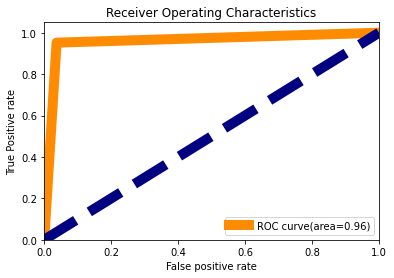

In [87]:
from sklearn.metrics import roc_curve,auc #roc=reeciver operating characteristics, auc= area under curve
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right') #loc indicates location 
plt.show()